In [ ]:
## Was Brexit About Globalisation?

## No, not really?

In [7]:
dataset_name = "W20_only"
df_list = 'BES_Panel'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

Toggle code

In [40]:
search(BES_Panel,"global|eurefvote|wt|immig")

wt                          31468
immigEcon                   31468
immigCultural               31468
euRefVoteAfter              30950
globalGoodOverall           31468
immigrantsWelfareState      31468
immigSelf                   31468
immigCon                    31468
immigLab                    31468
immigLD                     31468
immigSNP                     2730
immigPC                      1804
immigBrexit                 31468
immigGreen                  31468
enviroGrowth                31468
achieveReduceImmigCon        7902
achieveReduceImmigLab        7902
achieveReduceImmigLD         7902
achieveReduceImmigSNP         657
achieveReduceImmigPC          447
achieveReduceImmigGrn        7902
achieveReduceImmigBrexit     7902
achieveReduceImmigNone       7902
dealPriorityImmig            7892
selfPriorities_immig         7900
conPriorities_immig          7900
labPriorities_immig          7900
ldPriorities_immig           7900
grnPriorities_immig          7900
globalTrade   

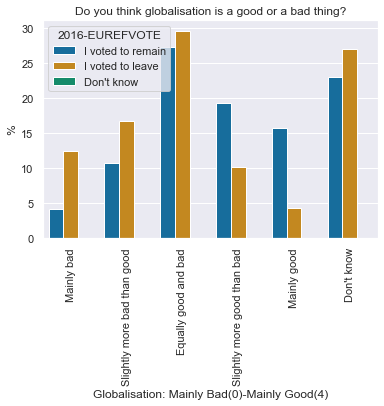

In [48]:
df = pd.crosstab(BES_Panel["globalGoodOverall"],
            BES_Panel["p_eurefvote"],values=BES_Panel["wt"],aggfunc=sum,normalize='columns')*100
df=df.drop("Don't know",axis=1,)        

df = df.stack().reset_index()
df.columns = ["Globalisation: Mainly Bad(0)-Mainly Good(4)","2016-EUREFVOTE","%"]

sns.barplot(data=df,x=df.columns[0],hue=df.columns[1],y=df.columns[2]);
plt.xticks(rotation=90);
plt.title("Do you think globalisation is a good or a bad thing?");

In [88]:
text_dict = {"globalTrade":"International trade",
             "globalBanks":"International banking and finance",
             "globalMigration":"International migration",
             "globalTourism":"Global tourism",
             "globalPlanes":"International air travel",
             "globalFilms":"Access to films, TV, music\nand sport from other countries",
             "globalBrands":"Multinational brands on high\nstreets across the world\n(e.g. McDonalds, IKEA)",
             "globalTalk":"Fast and cheap communication\nwith people overseas",
             "globalOrgs":"The influence of\ninternational organisations\n(e.g. the United Nations)",
            }

In [99]:
search(BES_Panel,"global[^G]").index

Index(['globalTrade', 'globalBanks', 'globalMigration', 'globalTourism',
       'globalPlanes', 'globalFilms', 'globalBrands', 'globalTalk',
       'globalOrgs'],
      dtype='object')

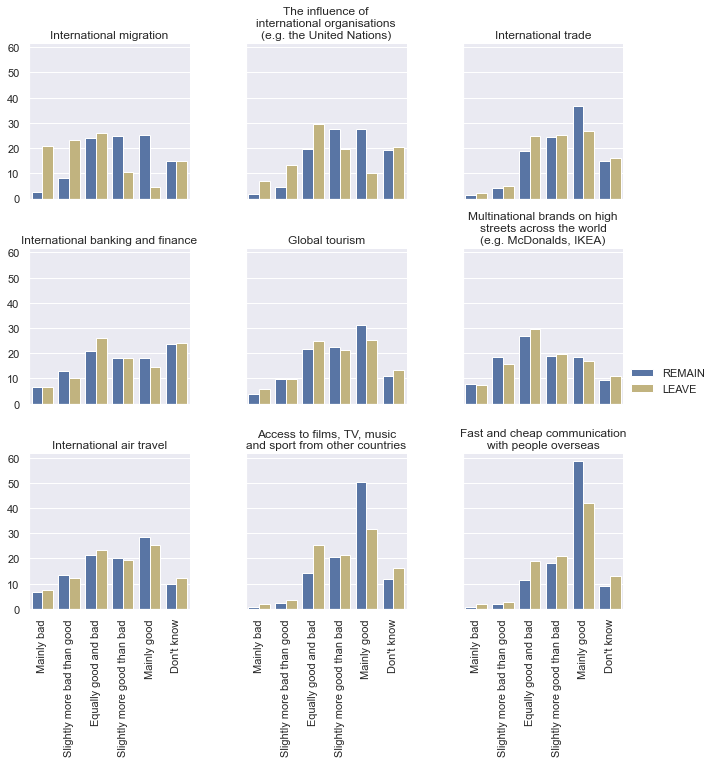

In [101]:
df_list = []
for col in [ 'globalMigration',  'globalOrgs', 'globalTrade',
            'globalBanks', 'globalTourism','globalBrands',
       'globalPlanes', 'globalFilms',  'globalTalk',
       ]:
#     plt.figure()
    df = pd.crosstab(BES_Panel[col],
                BES_Panel["p_eurefvote"],values=BES_Panel["wt"],aggfunc=sum,normalize='columns')*100
    df=df.drop("Don't know",axis=1,)     
    
    df = df.stack().reset_index()
    df.columns = ["Growth Over Last Few Decades\nMainly Bad(0)-Mainly Good(4)","2016-EUREFVOTE","%"]
    df["2016-EUREFVOTE"] = df["2016-EUREFVOTE"].cat.remove_unused_categories()
    df["2016-EUREFVOTE"] = df["2016-EUREFVOTE"].replace({'I voted to remain':"REMAIN",'I voted to leave':"LEAVE"})
    df["col"] = text_dict[col]
    df_list.append(df)

g = sns.FacetGrid(data=pd.concat(df_list),col="col",col_wrap=3, height=3,aspect=1)
g.map_dataframe(sns.barplot, x=df.columns[0],hue=df.columns[1],y=df.columns[2],palette=['b','y']);
# plt.xticks(rotation=90);
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
g.add_legend();
g.set_titles(col_template="{col_name}");

In [93]:
# fig, axs = plt.subplots(9,3,3)

# ax_count = 0
# for col in search(BES_Panel,"global[^G]").index:
# #     plt.figure()
#     df = pd.crosstab(BES_Panel[col],
#                 BES_Panel["p_eurefvote"],values=BES_Panel["wt"],aggfunc=sum,normalize='columns')*100
#     df=df.drop("Don't know",axis=1,)        

#     df = df.stack().reset_index()
#     df.columns = ["Growth In "+col+" Over Last Few Decades\nMainly Bad(0)-Mainly Good(4)","2016-EUREFVOTE","%"]

#     sns.barplot(data=df,x=df.columns[0],hue=df.columns[1],y=df.columns[2],ax=axs[ax_count]);
#     ax_count=ax_count+1
#     plt.xticks(rotation=90);
#     plt.title(text_dict[col]);

Text(0.5, 1.0, 'Some people think that the UK should allow *many more* immigrants to come to the UK to live and\nothers think that the UK should allow *many fewer* immigrants. Where would you place yourself and\nthe parties on this scale?')

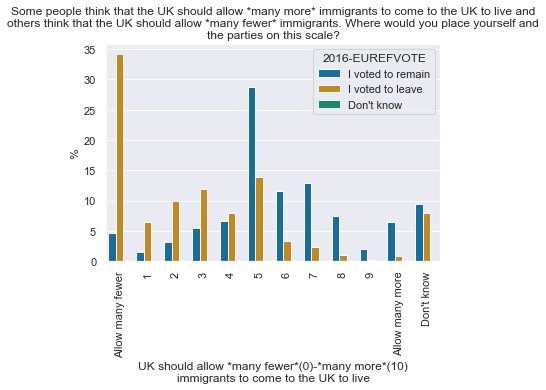

In [46]:
df = pd.crosstab(BES_Panel["immigSelf"],
            BES_Panel["p_eurefvote"],values=BES_Panel["wt"],aggfunc=sum,normalize='columns')*100
df = df.drop("Don't know",axis=1,)        

df = df.stack().reset_index()
df.columns = ["UK should allow *many fewer*(0)-*many more*(10)\nimmigrants to come to the UK to live","2016-EUREFVOTE","%"]

sns.barplot(data=df,x=df.columns[0],hue=df.columns[1],y=df.columns[2]);
plt.xticks(rotation=90);
plt.title("Some people think that the UK should allow *many more* immigrants to come to the UK to live and\n"+\
    "others think that the UK should allow *many fewer* immigrants. Where would you place yourself and\n"+\
    "the parties on this scale?");

In [49]:
search(BES_Panel,"age")

likeFarage            31468
benchCoronaGermany     7902
age                   31468
ageGroup               6741
p_education_age       30880
dtype: int64

In [53]:
age_20_40 = (BES_Panel["age"]>=20) & (BES_Panel["age"]<=40)

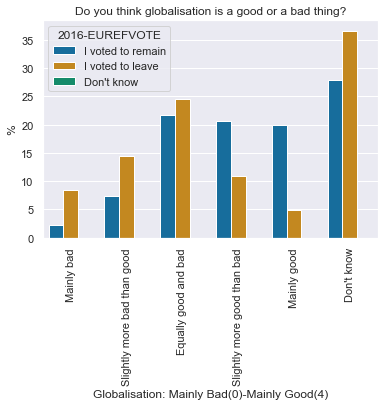

In [54]:
df = pd.crosstab(BES_Panel["globalGoodOverall"][age_20_40],
            BES_Panel["p_eurefvote"][age_20_40],values=BES_Panel["wt"][age_20_40],aggfunc=sum,normalize='columns')*100
df=df.drop("Don't know",axis=1,)        

df = df.stack().reset_index()
df.columns = ["Globalisation: Mainly Bad(0)-Mainly Good(4)","2016-EUREFVOTE","%"]

sns.barplot(data=df,x=df.columns[0],hue=df.columns[1],y=df.columns[2]);
plt.xticks(rotation=90);
plt.title("Do you think globalisation is a good or a bad thing?");

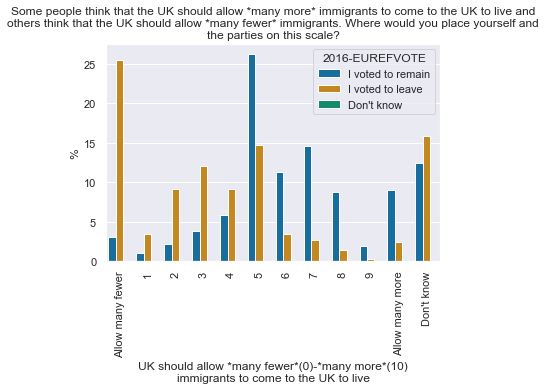

In [55]:
df = pd.crosstab(BES_Panel["immigSelf"][age_20_40],
            BES_Panel["p_eurefvote"][age_20_40],values=BES_Panel["wt"][age_20_40],aggfunc=sum,normalize='columns')*100
df = df.drop("Don't know",axis=1,)        

df = df.stack().reset_index()
df.columns = ["UK should allow *many fewer*(0)-*many more*(10)\nimmigrants to come to the UK to live","2016-EUREFVOTE","%"]

sns.barplot(data=df,x=df.columns[0],hue=df.columns[1],y=df.columns[2]);
plt.xticks(rotation=90);
plt.title("Some people think that the UK should allow *many more* immigrants to come to the UK to live and\n"+\
    "others think that the UK should allow *many fewer* immigrants. Where would you place yourself and\n"+\
    "the parties on this scale?");

In [57]:
age_20_40.sum()

8762

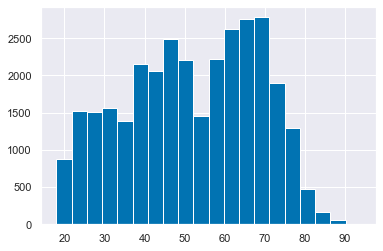

In [52]:
BES_Panel["age"].hist(bins=20)

In [102]:
dataset_name = "W9_only"
df_list = 'BES_Panel'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

Toggle code

In [104]:
search(BES_Panel,"immig|eurefvote|wt")

wt                        30036
euRefVoteHypothetical      1788
euRefVote                 28248
controlImmig              30036
immigSelf                 30036
immigCon                  30036
immigLab                  30036
immigLD                   30036
immigSNP                   3892
immigPC                    2337
immigUKIP                 30036
immigGreen                30036
achieveReduceImmigCon     30036
achieveReduceImmigLab     30036
achieveReduceImmigLD      30036
achieveReduceImmigSNP      3892
achieveReduceImmigPC       2337
achieveReduceImmigUKIP    30036
achieveReduceImmigGrn     30036
achieveReduceImmigNone    30036
conPriorities_immig        7442
labPriorities_immig        7442
ldPriorities_immig         7442
ukipPriorities_immig       7442
profile_eurefvote         28248
dtype: int64

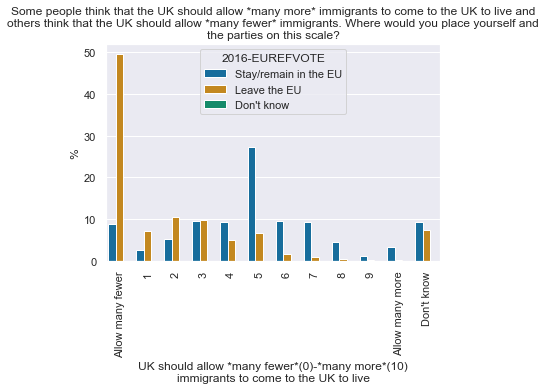

In [105]:
df = pd.crosstab(BES_Panel["immigSelf"],
            BES_Panel["profile_eurefvote"],values=BES_Panel["wt"],aggfunc=sum,normalize='columns')*100
df = df.drop("Don't know",axis=1,)        

df = df.stack().reset_index()
df.columns = ["UK should allow *many fewer*(0)-*many more*(10)\nimmigrants to come to the UK to live","2016-EUREFVOTE","%"]

sns.barplot(data=df,x=df.columns[0],hue=df.columns[1],y=df.columns[2]);
plt.xticks(rotation=90);
plt.title("Some people think that the UK should allow *many more* immigrants to come to the UK to live and\n"+\
    "others think that the UK should allow *many fewer* immigrants. Where would you place yourself and\n"+\
    "the parties on this scale?");